In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\mousami Datascience class\Regression Analysis\Multi Linear Regression\MLR Excel\Computer_Data.csv')
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [4]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [47]:
df.describe()

,price,speed,hd,ram,screen,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.902221,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.297040,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,1.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,1.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,339.000000,35.000000


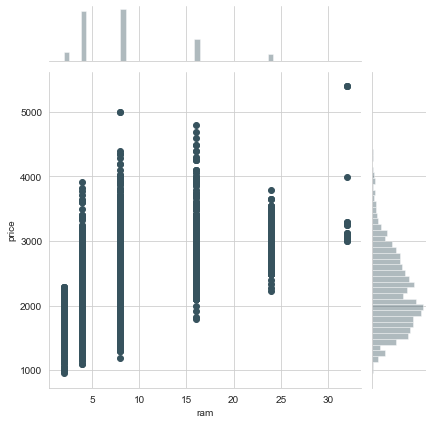

In [124]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='ram',y='price',data=df)

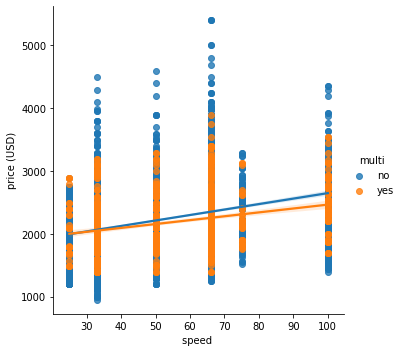

In [50]:
a = sns.lmplot(x="speed", y="price",hue='multi',height=5, data=df)

a.set_axis_labels("speed ", "price (USD)")

In [8]:
df.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


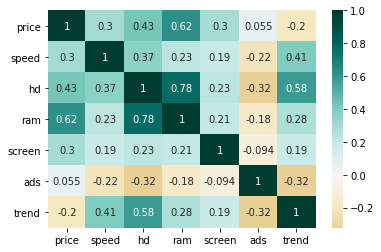

In [9]:
sns.heatmap(data = df.corr(), center=0, cmap='BrBG', annot=True)

In [45]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'premium'. 
df['premium']= label_encoder.fit_transform(df['premium']) 
  
df['premium'].unique() 

array([1, 0])

In [51]:
X = df[[ 'speed', 'hd', 'ram', 'screen','premium', 'trend']]
X.head()

,speed,hd,ram,screen,premium,trend
0,25,80,4,14,1,1
1,33,85,2,14,1,1
2,25,170,4,15,1,1
3,25,170,8,14,0,1
4,33,340,16,14,1,1


In [52]:
Y = df['price']
Y.head()

0    1499
1    1795
2    1595
3    1849
4    3295
Name: price, dtype: int64

In [53]:
# Train and Test Split.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [56]:
# Train data

X_train = X[0:3000]
X_train.head()

,speed,hd,ram,screen,premium,trend
0,25,80,4,14,1,1
1,33,85,2,14,1,1
2,25,170,4,15,1,1
3,25,170,8,14,0,1
4,33,340,16,14,1,1


In [57]:
Y_train = Y[0:3000]
Y_train.head()

0    1499
1    1795
2    1595
3    1849
4    3295
Name: price, dtype: int64

In [58]:
# Test Data

X_test = X[3000:3500]
X_test.head()

,speed,hd,ram,screen,premium,trend
3000,25,426,8,14,1,15
3001,25,426,8,15,1,15
3002,50,420,8,17,1,15
3003,50,340,4,14,0,15
3004,50,420,8,15,1,15


In [59]:
Y_test = Y[3000:3500]
Y_test.head()

3000    1895
3001    1990
3002    2744
3003    2259
3004    2195
Name: price, dtype: int64

In [60]:
# Model fitting and training.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lm.intercept_

-51.07643768386424

In [66]:
lm.coef_

array([  13.1412331 ,    1.56328958,   47.73646239,  120.49153777,
       -434.55478947,  -40.00260044])

In [69]:
df1 = pd.DataFrame(data = lm.coef_,index = X_train.columns,columns = ['Coefficients'] )
df1

,Coefficients
speed,13.141233
hd,1.563290
ram,47.736462
screen,120.491538
premium,-434.554789
trend,-40.002600


In [75]:
# Calculation of the standard errors.

n = X_train.shape[0]
n
print('Number of rows :',n)
k = X_train.shape[1]
k
print('Number of columns :',k)

deg_freedom = n-k
deg_freedom
print('Degree of Freedom :',deg_freedom)




Number of rows : 3000
Number of columns : 6
Degree of Freedom : 2994


In [77]:
# Prediction

X_train_pred = lm.predict(X_train)


array([1805.78754434, 1823.26093224, 2066.97514402, ..., 2624.07228197,
       1297.61689674, 2426.61754648])

In [104]:
# Train error

Train_error = np.square(X_train_pred - Y_train)
Train_error

0        94118.597364
1          798.680291
2       222760.536576
3       522706.218904
4       163854.743551
            ...      
2995     14382.657552
2996     62488.751279
2997     16659.653973
2998      9483.468800
2999     18664.354007
Name: price, Length: 3000, dtype: float64

In [105]:
sum_error = np.sum(X_train_pred)
sum_error

6942381.0

In [106]:
# R-squared for the model fit [TRAIN]

print('R-Squared :', round(metrics.r2_score(Y_train,X_train_pred),2))

R-Squared : 0.78


In [107]:
print('MSE :', Train_error.mean())

print('RMSE :', np.sqrt( Train_error.mean()))

MSE : 79127.8314417762
RMSE : 281.29669646438475


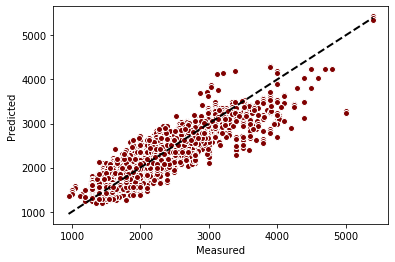

In [120]:
# Plot outputs

fig, ax = plt.subplots()
ax.scatter(Y_train, X_train_pred,color='maroon',edgecolors='white')
ax.plot([Y_train.min(),Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

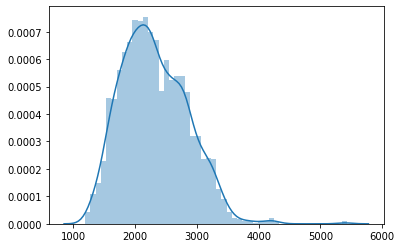

In [122]:
sns.distplot((X_train_pred),bins=50);